<a href="https://colab.research.google.com/github/shahd1995913/Deepfake-Privacy-Preserving-AI-Based-Early-Fall-Detection-for-our-Elders/blob/main/(Facial%20Expression%20Recognition%20and%20pose%20estimation/Facial_expression_analysis_in_images_on_an_image_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mediapipe Face Mesh

In [3]:
!pip install mediapipe
!pip install mediapipe deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.12.0.88
    Uninstalling opencv

Upload an image


Saving c0261819-800px-wm.jpg to c0261819-800px-wm.jpg


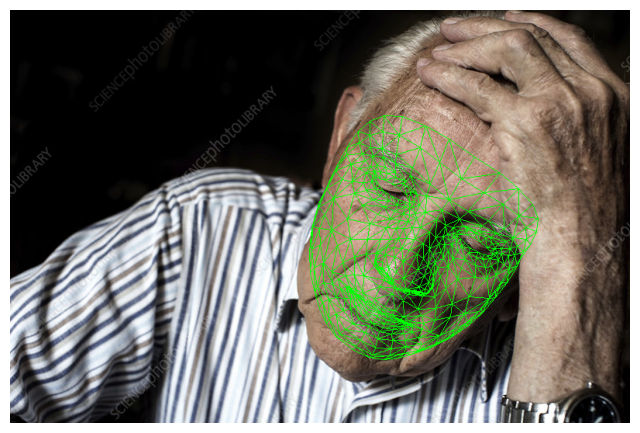

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from PIL import Image
import io

mp_face_mesh = mp.solutions.face_mesh

def process_image(image_bytes):
    image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img = np.array(image)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1) as face_mesh:
        results = face_mesh.process(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        if not results.multi_face_landmarks:
            print("No face detected")
            return

        annotated_image = img_bgr.copy()
        for face_landmarks in results.multi_face_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)
            )
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

print("Upload an image")
uploaded = files.upload()
for fn in uploaded:
    process_image(uploaded[fn])

Upload an image


Saving c0261819-800px-wm.jpg to c0261819-800px-wm (1).jpg


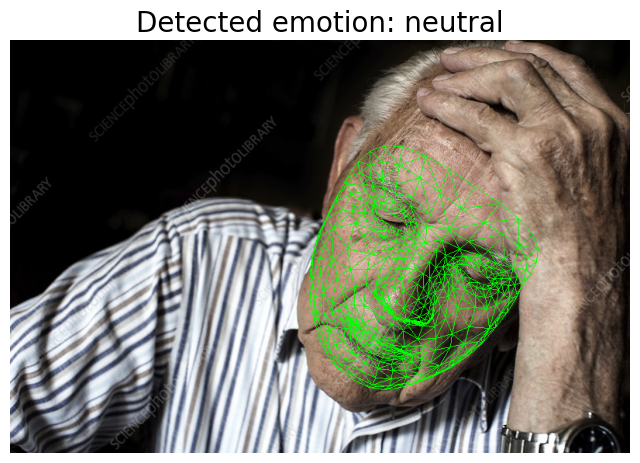

In [3]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from PIL import Image
import io
from deepface import DeepFace

mp_face_mesh = mp.solutions.face_mesh

def process_image_with_emotion(image_bytes):
    image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img = np.array(image)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1) as face_mesh:
        results = face_mesh.process(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        if not results.multi_face_landmarks:
            print("No face detected by Mediapipe")
            return

        annotated_image = img_bgr.copy()
        for face_landmarks in results.multi_face_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)
            )

    temp_filename = "temp_img.jpg"
    image.save(temp_filename)
    emotion_result = DeepFace.analyze(img_path=temp_filename, actions=['emotion'], enforce_detection=False)
    dominant_emotion = emotion_result[0]['dominant_emotion']  # هنا التعديل

    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Detected emotion: {dominant_emotion}", fontsize=20)
    plt.show()

print("Upload an image")
uploaded = files.upload()
for fn in uploaded:
    process_image_with_emotion(uploaded[fn])


# Face Alignment

In [4]:
!pip install face-alignment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [10]:
import face_alignment
print(dir(face_alignment.LandmarksType))

['THREE_D', 'TWO_D', 'TWO_HALF_D', '__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__contains__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__iter__', '__le__', '__len__', '__lshift__', '__lt__', '__members__', '__mod__', '__module__', '__mul__', '__name__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__qualname__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit

Saving istockphoto-1132432479-612x612.jpg to istockphoto-1132432479-612x612 (2).jpg


Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:05<00:00, 17.3MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:05<00:00, 17.5MB/s]


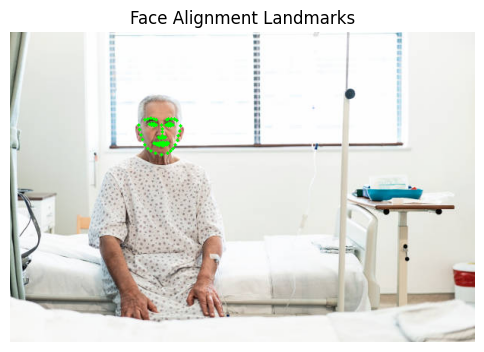

In [11]:
import face_alignment
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
from google.colab import files
import cv2

def face_alignment_landmarks(image_bytes):
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device='cpu')
    img = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img_np = np.array(img)
    preds = fa.get_landmarks(img_np)

    if preds is None:
        print("No face detected by Face Alignment.")
        return

    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    for landmark in preds:
        for (x, y) in landmark:
            cv2.circle(img_bgr, (int(x), int(y)), 2, (0,255,0), -1)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Face Alignment Landmarks")
    plt.show()

uploaded = files.upload()
for fn in uploaded:
    face_alignment_landmarks(uploaded[fn])

Upload an image to analyze face landmarks and emotion:


Saving c0261819-800px-wm.jpg to c0261819-800px-wm (5).jpg


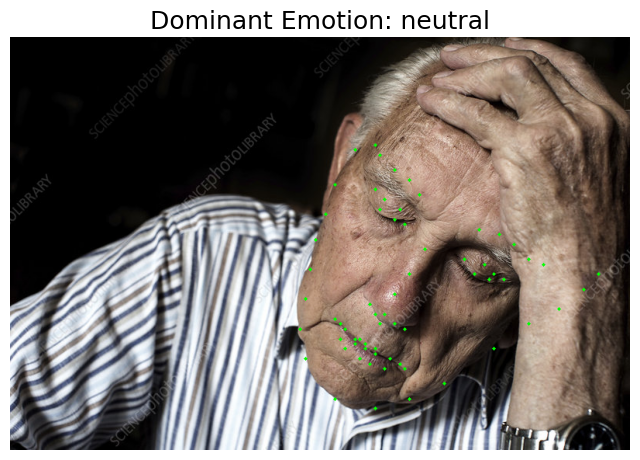

In [13]:
# !pip install face-alignment deepface --quiet

import face_alignment
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
from google.colab import files
import cv2

def analyze_face_and_emotion(image_bytes):
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device='cpu')
    img = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img_np = np.array(img)
    preds = fa.get_landmarks(img_np)

    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    if preds is not None:
        for landmark in preds:
            for (x, y) in landmark:
                cv2.circle(img_bgr, (int(x), int(y)), 2, (0,255,0), -1)
    else:
        print("No face detected by Face Alignment.")

    result = DeepFace.analyze(img_np, actions=['emotion'], enforce_detection=False)
    if isinstance(result, list):
        dominant_emotion = result[0]['dominant_emotion']
    else:
        dominant_emotion = result['dominant_emotion']

    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Dominant Emotion: {dominant_emotion}", fontsize=18)
    plt.show()

print("Upload an image to analyze face landmarks and emotion:")
uploaded = files.upload()
for fn in uploaded:
    analyze_face_and_emotion(uploaded[fn])
